In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
mlp_data = [
    {
        "MAE":  0.25227782130241394,
        "PCC":  0.39025697,
        "Jensen-Shannon Distance":  0.6865222,
        "weight distribution": 22.45842756939494,
        "betweenness centrality": 0.03987694404836637,
        "eigenvector centrality": 0.016861909557654497,
        "PageRank centrality": 0.0009517033349417572,
        "core-periphery structure": 0.04852581193664204,
    },
    {
        "MAE":  0.23413491249084473,
        "PCC":  0.41197568,
        "Jensen-Shannon Distance":  0.6368437,
        "weight distribution": 2.784818394164327,
        "betweenness centrality": 0.03483604312108156,
        "eigenvector centrality": 0.014169355662286451,
        "PageRank centrality": 0.0007750960391306481,
        "core-periphery structure": 0.006132921721750607,
    },
    {
        "MAE":  0.25462082028388977,
        "PCC":  0.3765818,
        "Jensen-Shannon Distance":  0.68462414,
        "weight distribution": 22.041837961928483,
        "betweenness centrality": 0.03872794522575595,
        "eigenvector centrality": 0.016530098866399143,
        "PageRank centrality": 0.0009161883733721457,
        "core-periphery structure": 0.04879789205959205,
    }
]

In [8]:
gsr_data = [
    {
        "MAE":  0.14115672928059217,
        "PCC":  0.5978468490905261,
        "Jensen-Shannon Distance":  0.2939872036502862,
        "weight distribution": 0.11875550446163344,
        "betweenness centrality": 0.024354928251608152,
        "eigenvector centrality": 0.007064946112515511,
        "PageRank centrality": 0.0003910916479561017,
        "core-periphery structure": 0.006271792811174885,
    },
    {
        "MAE":  0.15161396227831872,
        "PCC":  0.5615397789417158,
        "Jensen-Shannon Distance":  0.3105079870449256,
        "weight distribution": 0.2672552636060623,
        "betweenness centrality": 0.02363359743660918,
        "eigenvector centrality": 0.007344757698612146,
        "PageRank centrality": 0.0004081755358835946,
        "core-periphery structure": 0.005906150123542146,
    },
    {
        "MAE":  0.14475048225921733,
        "PCC":  0.5884271620144524,
        "Jensen-Shannon Distance":  0.297241985470448,
        "weight distribution": 0.17427059388807456,
        "betweenness centrality": 0.02392403378210593,
        "eigenvector centrality": 0.007126514763811845,
        "PageRank centrality": 0.000396799192287056,
        "core-periphery structure": 0.005844598887412305,
    }
]

In [9]:
trans_data = [
    {
        "MAE": 0.157,
        "PCC": 0.24905959,
        "Jensen-Shannon Distance": 0.34699193,
        "weight distribution": 15.705938576056004,
        "betweenness centrality": 0.0190706752837149,
        "eigenvector centrality": 0.016182166064907084,
        "PageRank centrality": 0.0006592548558454466,
        "core-periphery structure": 0.03253851566006781,
    },
    {
        'MAE': 0.15285075022645872, 
        'PCC': 0.27503242022287305, 
        'Jensen-Shannon Distance': 0.32277900534871405, 
        'weight distribution': 12.177498926208896, 
        'betweenness centrality': 0.0221955915447501, 
        'eigenvector centrality': 0.015467187843095606, 
        'PageRank centrality': 0.0006100136267637885, 
        'core-periphery structure': 0.03575971959777171
    },
    {
        'MAE': 0.155116143255122, 
        'PCC': 0.2702897406854034, 
        'Jensen-Shannon Distance': 0.3055695222487031, 
        'weight distribution': 16.647644287026099, 
        'betweenness centrality': 0.018260677242334076, 
        'eigenvector centrality': 0.01722550986318441, 
        'PageRank centrality': 0.0006166805346633923, 
        'core-periphery structure': 0.029052349979409187
    }
]

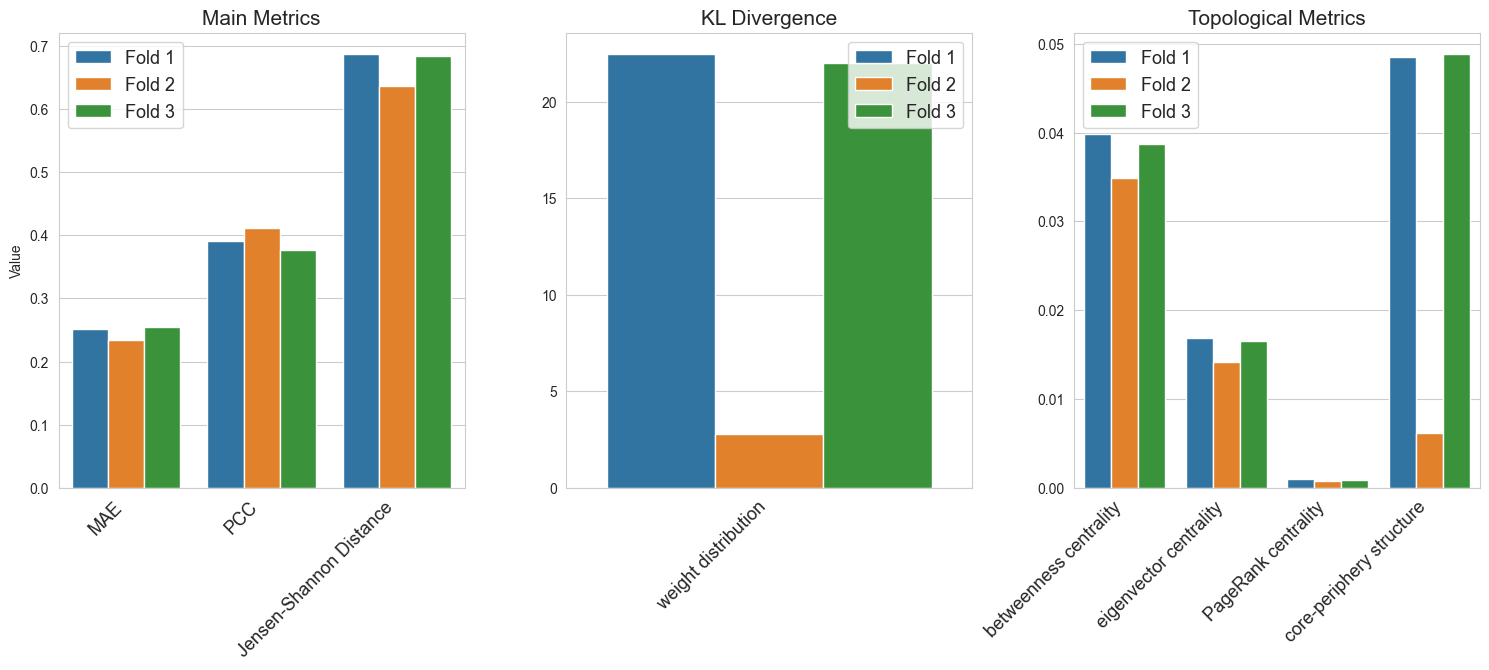

In [10]:
# Create a DataFrame
df = pd.DataFrame(mlp_data)
df['Fold'] = ['Fold 1', 'Fold 2', 'Fold 3']

# Calculate mean values for summary
means = {}
for metric in df.columns:
    if metric != 'Fold':
        means[metric] = df[metric].mean()

# Prepare data for visualization
metrics = [col for col in df.columns if col != 'Fold']
data_melted = pd.melt(df, id_vars=['Fold'], value_vars=metrics,
                      var_name='Metric', value_name='Value')

# Group metrics by scale to make the visualization more readable
scale_groups = {
    'Main Metrics': ['MAE', 'PCC', 'Jensen-Shannon Distance'],
    'KL Divergence': ['weight distribution'],
    'Topological Metrics': [
        'betweenness centrality',
        'eigenvector centrality', 
        'PageRank centrality',
        'core-periphery structure'
    ]
}

# Create a figure with grouped bar plots by metric
plt.figure(figsize=(15, 7))

for i, (group_name, group_metrics) in enumerate(scale_groups.items()):
    plt.subplot(1, 3, i+1)
    
    # For each group, create a dataframe with just those metrics
    group_data = data_melted[data_melted['Metric'].isin(group_metrics)]
    
    # Create a grouped bar plot with Metric on x-axis and bars colored by Fold
    sns.barplot(x='Metric', y='Value', hue='Fold', data=group_data)
    
    plt.title(group_name, fontsize=15)
    plt.legend(title='', fontsize=13)
    plt.xticks(rotation=45, ha='right', fontsize=13)
    plt.xlabel("")
    
    # Only show y-label for first subplot
    if i > 0:
        plt.ylabel('')
    
    # Tighten up the layout
    plt.tight_layout()

# plt.suptitle('MLP 3-Fold Validation Results (Grouped by Metric)', fontsize=16)
plt.subplots_adjust(top=0.9, bottom=0.25)
plt.savefig('mlp_validation_results_by_metric.png', dpi=300, bbox_inches='tight')
plt.show()

